<h1>Cegpy</h1>

<h3>Example 4: Chain Event Graph with structural and sampling zeros/missing values</h3>

The package, by default, treats all blank and `NaN` cells as structural missing values. However, sometimes these might occur due to sampling limitations. On the other hand, we might not observe a certain value for a variable (given its ancestral variables) not because that value is a structural zero but because of sampling limitations. 

In this example we cover two things,

1. How to define arguments to allow the package to distinguish between structual and sampling missing values?
    e.g. Falls example: Suppose that some individuals in communal establishments who are not formally assessed but are known to be high risk were actually either `Not Referred & Treated` or `Not Referred & Not Treated` but that these observations were missing in the `falls.xlsx` dataset. All the other blank/ `NaN` cells are structurally missing.

2. How to add a value which has not been observed in the dataset due to sampling limitations (i.e. its frequency is a sampling zero)?
    e.g. Falls example: Suppose that some individuals in the community who were assessed and high risk were `Referred & Not Treated`. Suppose that our observations are still the same as in the `falls.xlsx` dataset. Here, by design, this was allowed, but was not observed in the dataset. So we need to add this value in manually as a path ('Community Assessed', 'High Risk', 'Referred & Not Treated'). We also need to add in the values that follow it: i.e. ('Community Assessed', 'High Risk', 'Referred & Not Treated', 'Fall') and ('Community Assessed', 'High Risk', 'Referred & Not Treated', 'Don't Fall').


<h3> Part 1</h3>

The scenario is as described above. We can tell `cegpy` which cells refer to sampling missing values and which refer to structural missing values. For example, we can label them as `samp` and `struct` respectively. First, these labels need to be added to the `falls.xlsx` dataset.

In [41]:
import pandas as pd

dataframe_1 = pd.read_excel("falls.xlsx")
dataframe_1.head()

,HousingAssessment,Risk,Treatment,Fall
0,Community Not Assessed,Low Risk,NaN,Fall
1,Community Not Assessed,High Risk,NaN,Fall
2,Community Not Assessed,Low Risk,NaN,Don't Fall
3,Community Not Assessed,Low Risk,NaN,Don't Fall
4,Community Not Assessed,Low Risk,NaN,Fall


In [42]:
import numpy as np

idx1 = np.where((dataframe_1['HousingAssessment'] == 'Communal Not Assessed')\
     & (dataframe_1['Risk'] == 'High Risk'))
dataframe_1.loc[idx1]

,HousingAssessment,Risk,Treatment,Fall
67,Communal Not Assessed,High Risk,NaN,Fall
72,Communal Not Assessed,High Risk,NaN,Fall
95,Communal Not Assessed,High Risk,NaN,Fall
102,Communal Not Assessed,High Risk,NaN,Fall
132,Communal Not Assessed,High Risk,NaN,Fall
...,...,...,...,...
49065,Communal Not Assessed,High Risk,NaN,Fall
49087,Communal Not Assessed,High Risk,NaN,Fall
49135,Communal Not Assessed,High Risk,NaN,Don't Fall
49461,Communal Not Assessed,High Risk,NaN,Fall


We now set the `Treatment` values in the above cases as `samp` and all other missing values as `struct`.

In [43]:
dataframe_1['Treatment'].loc[idx1] = "samp"
dataframe_1.loc[idx1].head()

,HousingAssessment,Risk,Treatment,Fall
67,Communal Not Assessed,High Risk,samp,Fall
72,Communal Not Assessed,High Risk,samp,Fall
95,Communal Not Assessed,High Risk,samp,Fall
102,Communal Not Assessed,High Risk,samp,Fall
132,Communal Not Assessed,High Risk,samp,Fall


In [44]:
idx2 = dataframe_1["Treatment"].isna()
dataframe_1['Treatment'].loc[idx2] = 'struct'
dataframe_1.head()

,HousingAssessment,Risk,Treatment,Fall
0,Community Not Assessed,Low Risk,struct,Fall
1,Community Not Assessed,High Risk,struct,Fall
2,Community Not Assessed,Low Risk,struct,Don't Fall
3,Community Not Assessed,Low Risk,struct,Don't Fall
4,Community Not Assessed,Low Risk,struct,Fall


Next step is to tell the `EventTree` or `StagedTree` object about these missing value arguments as shown below. This will generate a new path along ('Communal Not Assessed', 'High Risk', 'missing'). The remainder of the analysis follows as shown in the other examples. 

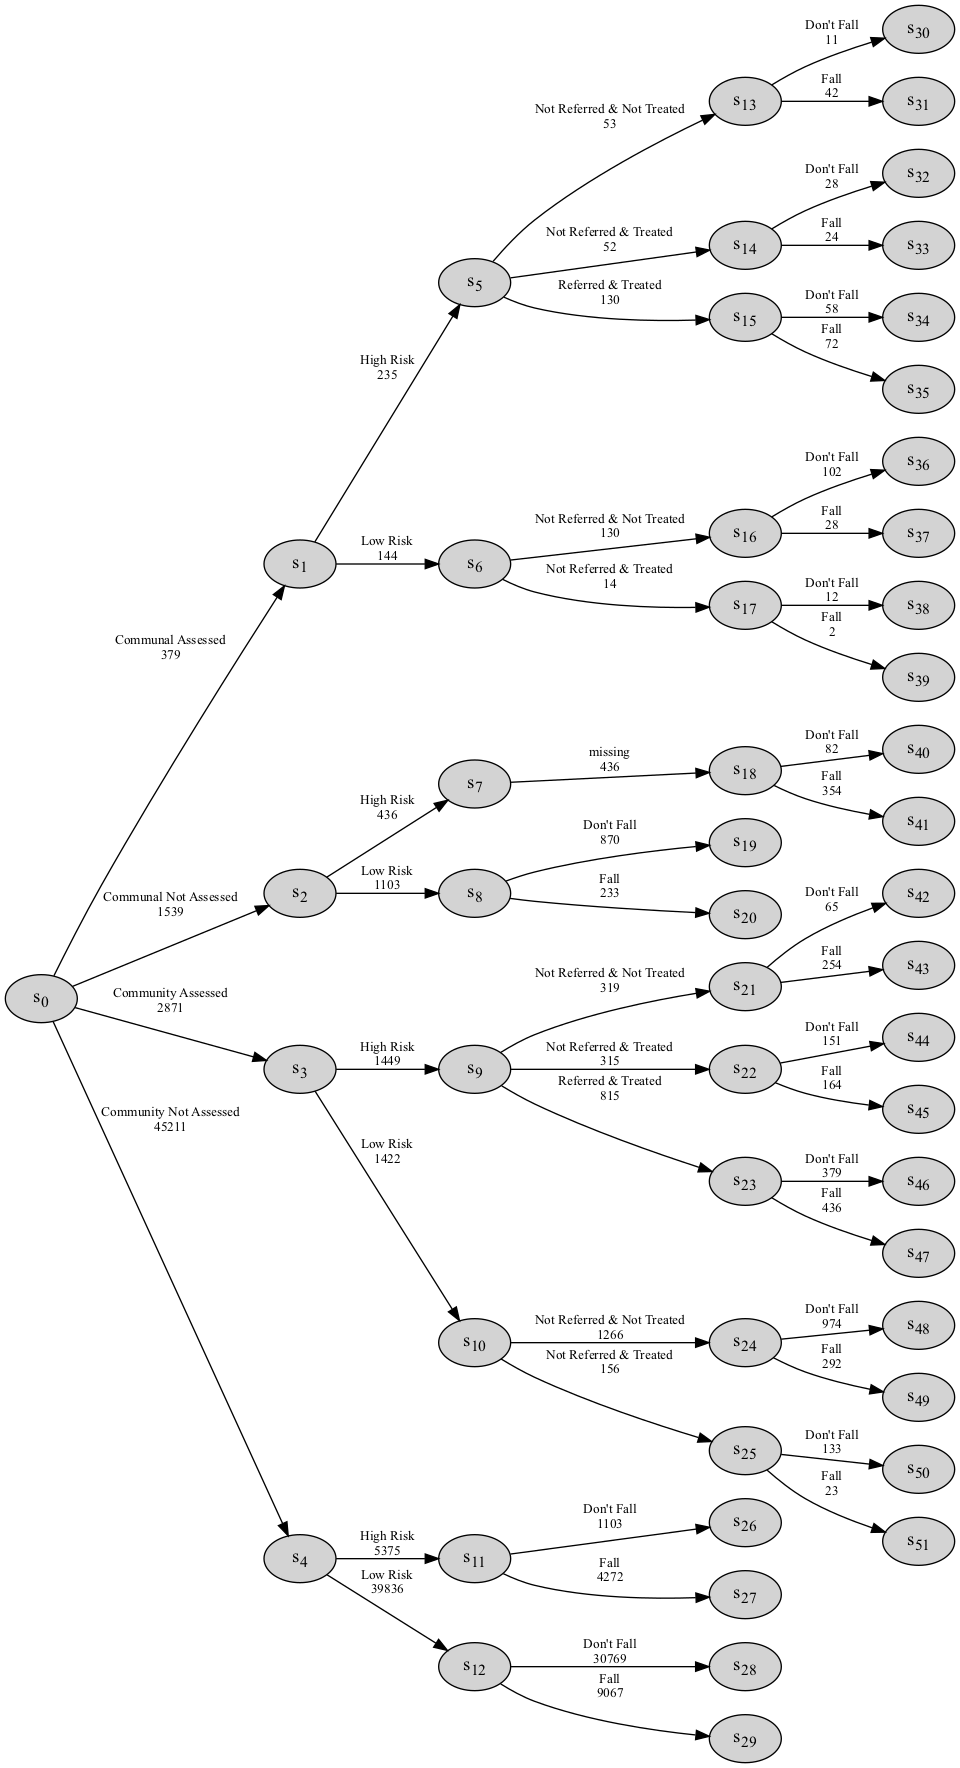

In [47]:
from cegpy import StagedTree

staged_tree = StagedTree(dataframe_1,
missing_label='samp',
struct_missing_label='struct'
)
staged_tree.create_event_tree_figure()